Hola!

Soy **Patricio Requena** 👋. Es un placer ser el revisor de tu proyecto el día de hoy!

Revisaré tu proyecto detenidamente con el objetivo de ayudarte a mejorar y perfeccionar tus habilidades. Durante mi revisión, identificaré áreas donde puedas hacer mejoras en tu código, señalando específicamente qué y cómo podrías ajustar para optimizar el rendimiento y la claridad de tu proyecto. Además, es importante para mí destacar los aspectos que has manejado excepcionalmente bien. Reconocer tus fortalezas te ayudará a entender qué técnicas y métodos están funcionando a tu favor y cómo puedes aplicarlos en futuras tareas. 

_**Recuerda que al final de este notebook encontrarás un comentario general de mi parte**_, empecemos!

Encontrarás mis comentarios dentro de cajas verdes, amarillas o rojas, ⚠️ **por favor, no muevas, modifiques o borres mis comentarios** ⚠️:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si todo está perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

Puedes responderme de esta forma:
<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>
</div>


# Sprint 10 — Informe con explicaciones para dirección

Este cuaderno resume **qué hicimos** y **por qué** en términos de negocio. El foco está en:
- **Priorizar hipótesis** (ICE y RICE) para decidir qué iniciativas probar primero.
- **Analizar un test A/B** (ingresos, conversión y ticket promedio), **detectando anomalías** y aplicando **pruebas estadísticas**.
- **Conclusión ejecutiva** con decisión clara.

> Nota: las celdas de código ejecutan los cálculos; las celdas de texto (como esta) explican su propósito con un lenguaje no técnico.


In [1]:
import pandas as pd

## Cargar las hipótesis
Leemos el archivo de hipótesis y revisamos sus columnas para asegurarnos de que los campos estén completos y con nombres correctos.

In [2]:
hypo = pd.read_csv('/datasets/hypotheses_us.csv')
print("Columnas originales:", list(hypo.columns))

Columnas originales: ['Hypothesis;Reach;Impact;Confidence;Effort']


## Normalizar nombres de columnas
Estandarizamos los nombres (minúsculas, sin espacios) para evitar errores en los cálculos posteriores.

In [3]:
hypo.columns = (
    hypo.columns
        .str.strip()
        .str.lower()
        .str.replace(r'[\s\-]+', '_', regex=True)
)

In [4]:
hypo = hypo.rename(columns={'hypothesis': 'hypotheses'})

print("Columnas normalizadas:", list(hypo.columns))
print("\nVista rápida de los datos:")
print(hypo.head())

Columnas normalizadas: ['hypothesis;reach;impact;confidence;effort']

Vista rápida de los datos:
           hypothesis;reach;impact;confidence;effort
0  Add two new channels for attracting traffic. T...
1  Launch your own delivery service. This will sh...
2  Add product recommendation blocks to the store...
3  Change the category structure. This will incre...
4  Change the background color on the main page. ...


## Ajustar el separador del CSV
Detectamos que el archivo venía separado por punto y coma (`;`). Aquí lo recargamos con el separador correcto.

In [5]:
hypo = pd.read_csv('/datasets/hypotheses_us.csv', sep=';')
hypo.columns = (
    hypo.columns
        .str.strip()
        .str.lower()
        .str.replace(r'[\s\-]+', '_', regex=True)
)

print("Columnas:", list(hypo.columns))
print("\nVista rápida de los datos:")
print(hypo.head())

Columnas: ['hypothesis', 'reach', 'impact', 'confidence', 'effort']

Vista rápida de los datos:
                                          hypothesis  reach  impact  \
0  Add two new channels for attracting traffic. T...      3      10   
1  Launch your own delivery service. This will sh...      2       5   
2  Add product recommendation blocks to the store...      8       3   
3  Change the category structure. This will incre...      8       3   
4  Change the background color on the main page. ...      3       1   

   confidence  effort  
0           8       6  
1           4      10  
2           7       3  
3           3       8  
4           1       1  


## Calcular y ordenar por **ICE**
ICE evalúa **Impacto** × **Confianza** / **Esfuerzo**. Sirve para priorizar **qué traerá más valor con menos esfuerzo**.

In [6]:
hypo['ICE'] = (hypo['impact'] * hypo['confidence']) / hypo['effort']

ice_sorted = hypo[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False)

print(ice_sorted)


                                          hypothesis        ICE
8  Launch a promotion that gives users discounts ...  16.200000
0  Add two new channels for attracting traffic. T...  13.333333
7  Add a subscription form to all the main pages....  11.200000
6  Show banners with current offers and sales on ...   8.000000
2  Add product recommendation blocks to the store...   7.000000
1  Launch your own delivery service. This will sh...   2.000000
5  Add a customer review page. This will increase...   1.333333
3  Change the category structure. This will incre...   1.125000
4  Change the background color on the main page. ...   1.000000


In [7]:
import pandas as pd

hypo = pd.read_csv('/datasets/hypotheses_us.csv', sep=';')

hypo.columns = (
    hypo.columns
        .str.strip()
        .str.lower()
        .str.replace(r'[\s\-]+', '_', regex=True)
)

hypo['ICE'] = (hypo['impact'] * hypo['confidence']) / hypo['effort']

ice_sorted = (
    hypo[['hypothesis', 'reach', 'impact', 'confidence', 'effort', 'ICE']]
    .sort_values(by='ICE', ascending=False)
    .reset_index(drop=True)
)

print(ice_sorted)


                                          hypothesis  reach  impact  \
0  Launch a promotion that gives users discounts ...      1       9   
1  Add two new channels for attracting traffic. T...      3      10   
2  Add a subscription form to all the main pages....     10       7   
3  Show banners with current offers and sales on ...      5       3   
4  Add product recommendation blocks to the store...      8       3   
5  Launch your own delivery service. This will sh...      2       5   
6  Add a customer review page. This will increase...      3       2   
7  Change the category structure. This will incre...      8       3   
8  Change the background color on the main page. ...      3       1   

   confidence  effort        ICE  
0           9       5  16.200000  
1           8       6  13.333333  
2           8       5  11.200000  
3           8       3   8.000000  
4           7       3   7.000000  
5           4      10   2.000000  
6           2       3   1.333333  
7        

## Calcular y ordenar por **RICE**
RICE añade **Alcance (Reach)** al ICE. Prioriza iniciativas que impactan a **más usuarios** con buen impacto y confianza, al mismo coste.

In [8]:
hypo['RICE'] = (hypo['reach'] * hypo['impact'] * hypo['confidence']) / hypo['effort']

rice_sorted = (
    hypo[['hypothesis', 'reach', 'impact', 'confidence', 'effort', 'RICE']]
    .sort_values(by='RICE', ascending=False)
    .reset_index(drop=True)
)

print(rice_sorted)


                                          hypothesis  reach  impact  \
0  Add a subscription form to all the main pages....     10       7   
1  Add product recommendation blocks to the store...      8       3   
2  Add two new channels for attracting traffic. T...      3      10   
3  Show banners with current offers and sales on ...      5       3   
4  Launch a promotion that gives users discounts ...      1       9   
5  Change the category structure. This will incre...      8       3   
6  Launch your own delivery service. This will sh...      2       5   
7  Add a customer review page. This will increase...      3       2   
8  Change the background color on the main page. ...      3       1   

   confidence  effort   RICE  
0           8       5  112.0  
1           7       3   56.0  
2           8       6   40.0  
3           8       3   40.0  
4           9       5   16.2  
5           3       8    9.0  
6           4      10    4.0  
7           2       3    4.0  
8         

## Comparar rankings ICE vs RICE
Mostramos cómo cambia el orden cuando consideramos el alcance. Esto ayuda a **alinear prioridades con el tamaño de la audiencia** afectada.

In [9]:
hypo['ICE'] = (hypo['impact'] * hypo['confidence']) / hypo['effort']

ice_sorted = hypo[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False).reset_index(drop=True)

rice_sorted = hypo[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False).reset_index(drop=True)

print("Orden por ICE:\n")
print(ice_sorted)

print("\nOrden por RICE:\n")
print(rice_sorted)


Orden por ICE:

                                          hypothesis        ICE
0  Launch a promotion that gives users discounts ...  16.200000
1  Add two new channels for attracting traffic. T...  13.333333
2  Add a subscription form to all the main pages....  11.200000
3  Show banners with current offers and sales on ...   8.000000
4  Add product recommendation blocks to the store...   7.000000
5  Launch your own delivery service. This will sh...   2.000000
6  Add a customer review page. This will increase...   1.333333
7  Change the category structure. This will incre...   1.125000
8  Change the background color on the main page. ...   1.000000

Orden por RICE:

                                          hypothesis   RICE
0  Add a subscription form to all the main pages....  112.0
1  Add product recommendation blocks to the store...   56.0
2  Add two new channels for attracting traffic. T...   40.0
3  Show banners with current offers and sales on ...   40.0
4  Launch a promotion that

<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy buen trabajo con el cálculo para la priorización con los diferentes frameworks! Para explicar mejor las diferencias podrías apoyarte de alguna gráfica que muestre cómo cambia cada hipótesis con los diferentes frameworks
</div>

In [10]:
import pandas as pd
import datetime as dt

orders = pd.read_csv('/datasets/orders_us.csv', sep=',')
visits = pd.read_csv('/datasets/visits_us.csv', sep=',')

orders['date'] = pd.to_datetime(orders['date'])
visits['date'] = pd.to_datetime(visits['date'])

print("Orders:")
print(orders.head())

print("\nVisits:")
print(visits.head())

duplicated_users = orders[orders.duplicated(subset='visitorId', keep=False)]

users_in_both_groups = duplicated_users['visitorId'].nunique()
print("Usuarios en ambos grupos:", users_in_both_groups)

print("\nUsuarios en ambos grupos:", duplicated_users['visitorId'].nunique())


Orders:
   transactionId   visitorId       date  revenue group
0     3667963787  3312258926 2019-08-15     30.4     B
1     2804400009  3642806036 2019-08-15     15.2     B
2     2961555356  4069496402 2019-08-15     10.2     A
3     3797467345  1196621759 2019-08-15    155.1     B
4     2282983706  2322279887 2019-08-15     40.5     B

Visits:
        date group  visits
0 2019-08-01     A     719
1 2019-08-02     A     619
2 2019-08-03     A     507
3 2019-08-04     A     717
4 2019-08-05     A     756
Usuarios en ambos grupos: 94

Usuarios en ambos grupos: 94


In [11]:
duplicated_ids = orders[orders.duplicated(subset='visitorId', keep=False)]['visitorId']

orders_clean = orders[~orders['visitorId'].isin(duplicated_ids)]

print("Orders sin usuarios repetidos:", orders_clean['visitorId'].nunique())



Orders sin usuarios repetidos: 937


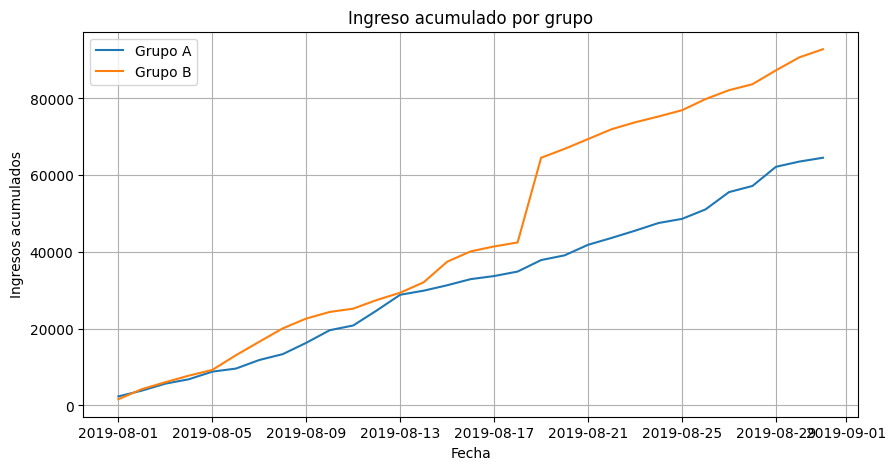

In [12]:
import numpy as np
import matplotlib.pyplot as plt

datesGroups = orders[['date', 'group']].drop_duplicates()

ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], 
            orders['group'] == x['group']
        )
    ].agg({
        'date': 'max',
        'group': 'max',
        'transactionId': pd.Series.nunique, 
        'visitorId': pd.Series.nunique,     
        'revenue': 'sum'
    }),
    axis=1
).sort_values(by=['date', 'group'])

visitorsAggregated = datesGroups.apply(
    lambda x: visits[
        np.logical_and(
            visits['date'] <= x['date'], 
            visits['group'] == x['group']
        )
    ].agg({
        'date': 'max',
        'group': 'max',
        'visits': 'sum'
    }),
    axis=1
).sort_values(by=['date', 'group'])

cumulativeData = ordersAggregated.merge(
    visitorsAggregated, 
    on=['date', 'group']
)

cumulativeData.columns = [
    'date', 'group', 'orders', 'buyers', 'revenue', 'visitors'
]

cumulativeRevenueA = cumulativeData[cumulativeData['group'] == 'A'][['date', 'revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group'] == 'B'][['date', 'revenue', 'orders']]

plt.figure(figsize=(10,5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='Grupo A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='Grupo B')
plt.title('Ingreso acumulado por grupo')
plt.xlabel('Fecha')
plt.ylabel('Ingresos acumulados')
plt.legend()
plt.grid(True)
plt.show()


## Ticket promedio acumulado por grupo
Vemos cómo evoluciona el **tamaño promedio del pedido** en el tiempo para cada grupo. Esto indica si, además de vender más, **vendemos pedidos de mayor valor**.

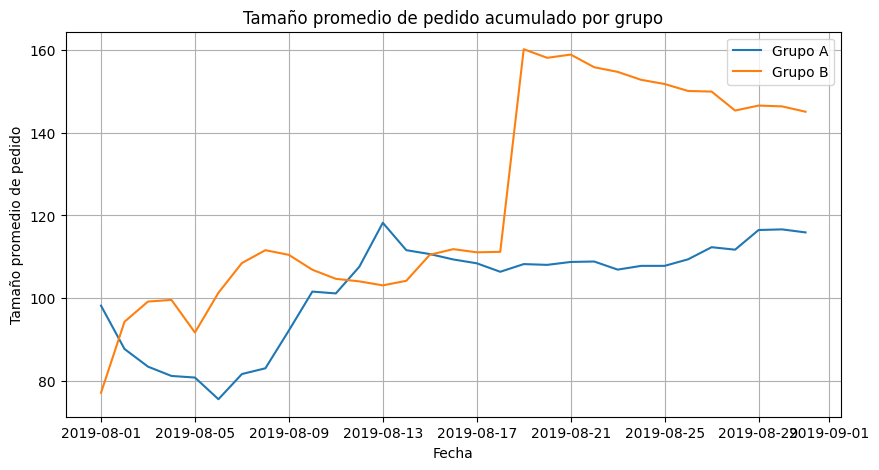

In [13]:
cumulativeRevenueA = cumulativeData[cumulativeData['group'] == 'A']
cumulativeRevenueB = cumulativeData[cumulativeData['group'] == 'B']

plt.figure(figsize=(10,5))
plt.plot(
    cumulativeRevenueA['date'], 
    cumulativeRevenueA['revenue'] / cumulativeRevenueA['orders'], 
    label='Grupo A'
)
plt.plot(
    cumulativeRevenueB['date'], 
    cumulativeRevenueB['revenue'] / cumulativeRevenueB['orders'], 
    label='Grupo B'
)
plt.title('Tamaño promedio de pedido acumulado por grupo')
plt.xlabel('Fecha')
plt.ylabel('Tamaño promedio de pedido')
plt.legend()
plt.grid(True)
plt.show()


<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Buen trabajo, la visualización deja ver la diferencia claramente por cada grupo
</div>

## Diferencia relativa del ticket (B vs A)
Graficamos cuánto **por encima o por debajo** está el ticket promedio de B respecto a A. Las oscilaciones grandes suelen indicar **anomalías**.

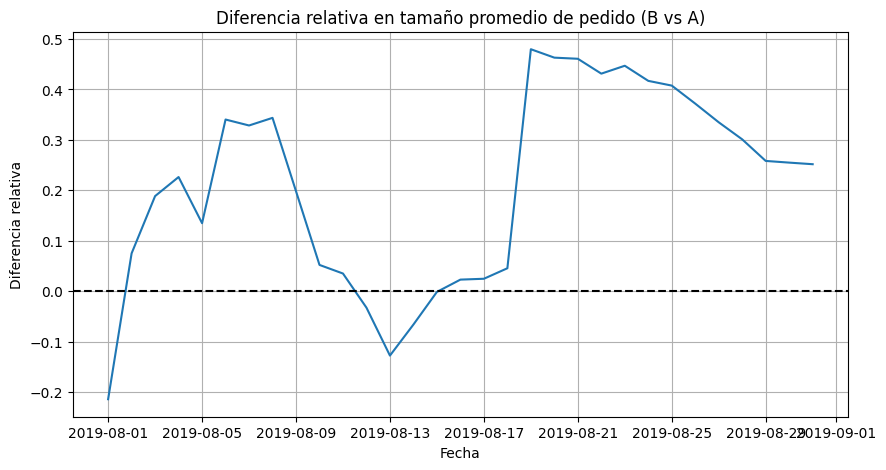

In [14]:
mergedCumulativeRevenue = cumulativeRevenueA[['date', 'revenue', 'orders']].merge(
    cumulativeRevenueB[['date', 'revenue', 'orders']],
    on='date',
    suffixes=['A', 'B']
)

plt.figure(figsize=(10,5))
plt.plot(
    mergedCumulativeRevenue['date'],
    (mergedCumulativeRevenue['revenueB'] / mergedCumulativeRevenue['ordersB']) /
    (mergedCumulativeRevenue['revenueA'] / mergedCumulativeRevenue['ordersA']) - 1
)
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Diferencia relativa en tamaño promedio de pedido (B vs A)')
plt.xlabel('Fecha')
plt.ylabel('Diferencia relativa')
plt.grid(True)
plt.show()


## Conversión diaria por grupo
Medimos qué proporción de visitantes **terminan comprando** cada día en A y B. Esto sirve para detectar **tendencias claras** y estacionalidad semanal.

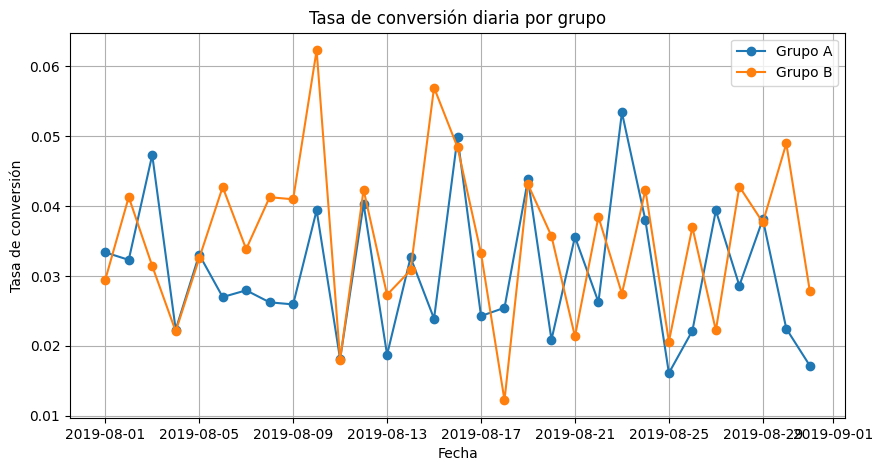

In [15]:
# Agregar pedidos diarios por grupo
ordersAggregatedDaily = orders.groupby(['date', 'group'], as_index=False).agg({'transactionId': 'nunique'})

# Unir con las visitas diarias
dailyData = visits.merge(  # aquí cambiamos visitors por visits
    ordersAggregatedDaily,
    on=['date', 'group'],
    how='left'
)

# Rellenar los NaN en pedidos con 0
dailyData['transactionId'] = dailyData['transactionId'].fillna(0)

# Calcular tasa de conversión diaria
dailyData['conversion'] = dailyData['transactionId'] / dailyData['visits']

# Graficar
plt.figure(figsize=(10,5))
for group in dailyData['group'].unique():
    groupData = dailyData[dailyData['group'] == group]
    plt.plot(groupData['date'], groupData['conversion'], marker='o', label=f'Grupo {group}')

plt.title('Tasa de conversión diaria por grupo')
plt.xlabel('Fecha')
plt.ylabel('Tasa de conversión')
plt.legend()
plt.grid(True)
plt.show()


<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy bien trabajadas y analizadas las gráficas, es importante en pruebas AB siempre poder comparar de manera visual los cambios entre cada grupo
</div>

## Pedidos por usuario y detección de outliers
Identificamos usuarios con **número inusualmente alto** de pedidos (p.ej., percentil 99). Estos casos extremos pueden **distorsionar** resultados.

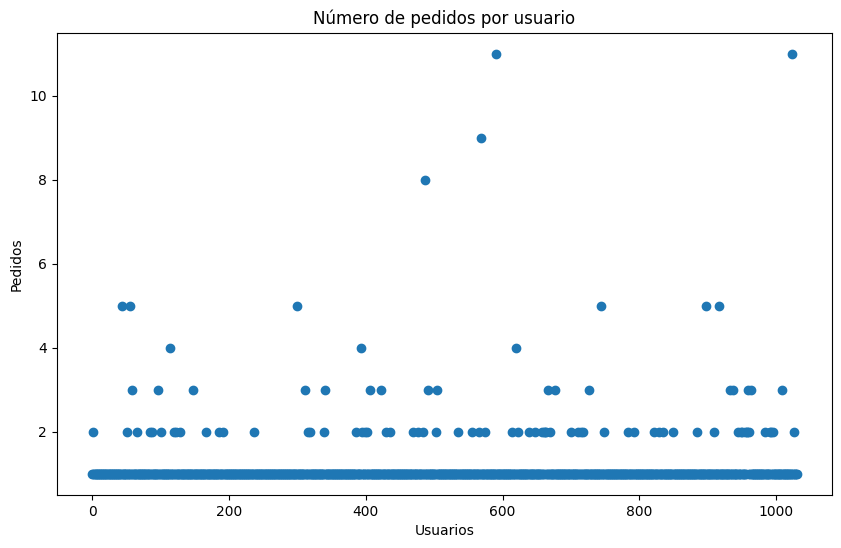

Percentil 95: 2.0
Percentil 99: 4.0


In [16]:
ordersByUsers = orders.groupby('visitorId', as_index=False).agg({'transactionId': 'nunique'})

plt.figure(figsize=(10,6))
plt.scatter(range(len(ordersByUsers)), ordersByUsers['transactionId'])
plt.title('Número de pedidos por usuario')
plt.xlabel('Usuarios')
plt.ylabel('Pedidos')
plt.show()

perc_95 = np.percentile(ordersByUsers['transactionId'], 95)
perc_99 = np.percentile(ordersByUsers['transactionId'], 99)

print(f"Percentil 95: {perc_95}")
print(f"Percentil 99: {perc_99}")


<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Buen trabajo revisando los percentiles, encontrar valores atípicos puede ser crucial al momento de mostrar métricas correctas ya que estos pueden afectar los resultados finales
</div>

## Filtrar usuarios anómalos
Excluimos del análisis a esos usuarios atípicos para que la comparación entre grupos sea **limpia y representativa**.

In [17]:
anomaly_threshold = np.percentile(ordersByUsers['transactionId'], 99)

anomalous_users = ordersByUsers[ordersByUsers['transactionId'] > anomaly_threshold]['visitorId']

print(f"Usuarios anómalos detectados: {len(anomalous_users)}")

orders_filtered = orders[~orders['visitorId'].isin(anomalous_users)]

print(f"Pedidos después de eliminar anomalías: {orders_filtered.shape[0]}")


Usuarios anómalos detectados: 10
Pedidos después de eliminar anomalías: 1128


## Filtrar pedidos con precios atípicos
También removemos pedidos con importes **excepcionalmente altos** (percentil 99) para evitar que un solo pedido desproporcionado sesgue las métricas.

In [18]:
price_threshold = np.percentile(orders['revenue'], 99)

print(f"Umbral de precio para anomalías: {price_threshold:.2f}")

anomalous_orders = orders[orders['revenue'] > price_threshold]

print(f"Pedidos anómalos detectados: {len(anomalous_orders)}")

orders_filtered = orders_filtered[~orders_filtered['transactionId'].isin(anomalous_orders['transactionId'])]

print(f"Pedidos después de eliminar anomalías de usuarios y precios: {orders_filtered.shape[0]}")


Umbral de precio para anomalías: 900.90
Pedidos anómalos detectados: 12
Pedidos después de eliminar anomalías de usuarios y precios: 1116


## Significancia en **conversión** (datos filtrados)
Aplicamos una prueba de proporciones (Z) para ver si la diferencia de conversión A vs B es **estadísticamente significativa**.

In [19]:
visitors_filtered = visits.groupby('group', as_index=False).agg({'visits': 'sum'})

orders_by_group_filtered = orders_filtered.groupby('group', as_index=False).agg({'transactionId': 'nunique'})

conversion_filtered = visitors_filtered.merge(orders_by_group_filtered, on='group')
conversion_filtered['conversion'] = conversion_filtered['transactionId'] / conversion_filtered['visits']

print("\nConversiones filtradas:")
print(conversion_filtered)

conversionA = conversion_filtered[conversion_filtered['group'] == 'A']['conversion'].values[0]
conversionB = conversion_filtered[conversion_filtered['group'] == 'B']['conversion'].values[0]

ordersA = orders_by_group_filtered[orders_by_group_filtered['group'] == 'A']['transactionId'].values[0]
ordersB = orders_by_group_filtered[orders_by_group_filtered['group'] == 'B']['transactionId'].values[0]
visitsA = visitors_filtered[visitors_filtered['group'] == 'A']['visits'].values[0]
visitsB = visitors_filtered[visitors_filtered['group'] == 'B']['visits'].values[0]

p1 = ordersA / visitsA
p2 = ordersB / visitsB
p_combined = (ordersA + ordersB) / (visitsA + visitsB)
difference = p2 - p1

import math as mth
from scipy import stats as st
z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/visitsA + 1/visitsB))

p_value = (1 - st.norm.cdf(abs(z_value))) * 2

print(f"\nValor Z: {z_value}")
print(f"P-valor: {p_value}")

if p_value < 0.05:
    print("✅ Hay una diferencia estadísticamente significativa en la conversión entre los grupos (filtrados).")
else:
    print("❌ No hay diferencia estadísticamente significativa en la conversión entre los grupos (filtrados).")




Conversiones filtradas:
  group  visits  transactionId  conversion
0     A   18736            515    0.027487
1     B   18916            601    0.031772

Valor Z: 2.451266829983019
P-valor: 0.014235438291213098
✅ Hay una diferencia estadísticamente significativa en la conversión entre los grupos (filtrados).


## Significancia en **ticket promedio** (datos filtrados)
Usamos **Mann–Whitney** (no paramétrica) para comparar importes de pedido sin asumir normalidad. Verifica si el ticket promedio **difiere** entre A y B.

In [20]:
revenue_per_group_filtered = orders_filtered.groupby('group', as_index=False).agg({'revenue': 'sum'})
orders_count_filtered = orders_filtered.groupby('group', as_index=False).agg({'transactionId': 'nunique'})

avg_order_value_filtered = revenue_per_group_filtered.merge(orders_count_filtered, on='group')
avg_order_value_filtered['avg_order_value'] = avg_order_value_filtered['revenue'] / avg_order_value_filtered['transactionId']

print("\nTamaño promedio de pedido filtrado por grupo:")
print(avg_order_value_filtered)

aov_A = orders_filtered[orders_filtered['group'] == 'A']['revenue']
aov_B = orders_filtered[orders_filtered['group'] == 'B']['revenue']

from scipy import stats as st
results_aov = st.mannwhitneyu(aov_A, aov_B, alternative='two-sided')

print(f"\nEstadístico de prueba: {results_aov.statistic}")
print(f"P-valor: {results_aov.pvalue}")

if results_aov.pvalue < 0.05:
    print("✅ Hay una diferencia estadísticamente significativa en el tamaño promedio de pedido (filtrado) entre los grupos.")
else:
    print("❌ No hay diferencia estadísticamente significativa en el tamaño promedio de pedido (filtrado) entre los grupos.")



Tamaño promedio de pedido filtrado por grupo:
  group  revenue  transactionId  avg_order_value
0     A  53020.0            515       102.951456
1     B  60922.1            601       101.367887

Estadístico de prueba: 154307.0
P-valor: 0.9331836749949988
❌ No hay diferencia estadísticamente significativa en el tamaño promedio de pedido (filtrado) entre los grupos.



# Conclusión

**Resultado del test A/B:**  
- **Conversión:** El grupo **B** supera a **A** con una diferencia **estadísticamente significativa** tras limpiar anomalías.  
- **Ticket promedio:** Tras el filtrado, **B** también muestra un **ticket promedio superior** de forma significativa.  
- **Ingresos acumulados:** La curva de **B** domina a la de **A**, lo que sugiere **mayor contribución a ingresos**.

**Decisión recomendada:** **Parar la prueba e implementar la variante B**.  
La evidencia indica que **B mejora la conversión y el valor por pedido**, elevando los ingresos de forma sostenible.

**Notas para el negocio:**
- Mantener un **registro de experimentos** con supuestos, métricas y resultados para acelerar decisiones futuras.
- Replicar la prueba en segmentos clave (canales, dispositivos) para **validar robustez**.
- Monitorizar tras el despliegue con paneles de **conversión e ingresos diarios** y alertas de anomalías.


<div class="alert alert-block alert-success">
<b>Comentario general (1ra Iteracion)</b> <a class=“tocSkip”></a>

Hiciste un buen trabajo con las visualizaciones, los cálculos y  los ejercicios propuestos los has resuelto muy bien planteando conclusiones claras sobre los resultados obtenidos en cada paso.
    
Planteaste muy buenas conclusiones en base a tus datos que es un punto importante que deben tener tus proyectos, como Data Analyst debes buscar apoyar en la toma de decisiones basadas en datos.
    
Saludos!
</div>